<a href="https://colab.research.google.com/github/RKNahid/Automated-Sleep-Stage-Detection-using-Machine-Learning-Algorithm/blob/main/Project_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Library & Reading

In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(x_temp,y_temp):
  smote = SMOTE()

  x_temp, y_temp = smote.fit_resample(x_temp, y_temp)

  return x_temp, y_temp 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project/REM_NREM.csv")
target = "Sleep_Stage"

##Level Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df[target] = encoder.fit_transform(df[target])

##Spliting

In [ ]:
x = df.loc[:,df.columns != target]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

*Balance Dataset*

In [ ]:
x_train, y_train = balance(x_train, y_train)

# Tunning

##N estimator

220/320 round completed......................... Accurecy: 0.9221099887766554
240/320 round completed......................... Accurecy: 0.9239057239057239
260/320 round completed......................... Accurecy: 0.9221661054994388
280/320 round completed......................... Accurecy: 0.922053872053872
300/320 round completed......................... Accurecy: 0.923063973063973
320/320 round completed......................... Accurecy: 0.9232323232323232
The best n_estimators:
240


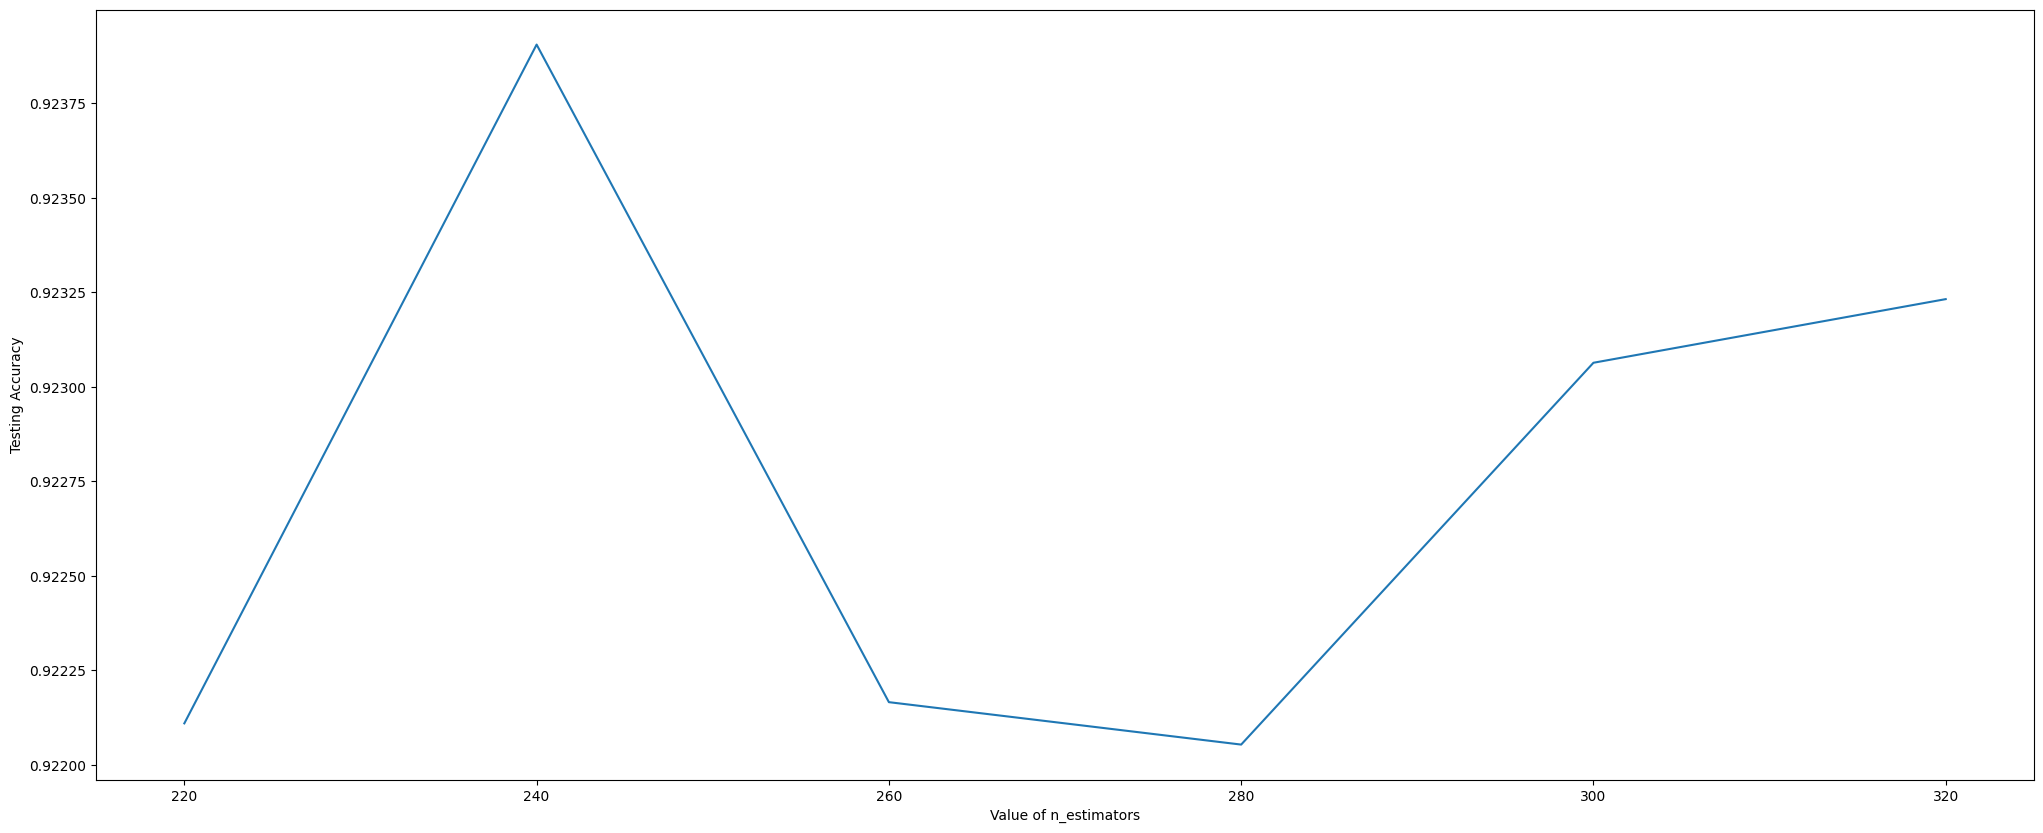

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=320
k_range = range (220,N+1,20)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)



#240

*Result for Best Estimator*

In [ ]:
%time
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator)
rf_estimator.fit(x_train, y_train)
y_pred=rf_estimator.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
[[13740   813]
 [  511  2756]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     14553
           1       0.77      0.84      0.81      3267

    accuracy                           0.93     17820
   macro avg       0.87      0.89      0.88     17820
weighted avg       0.93      0.93      0.93     17820

Accurecy:  0.9257014590347924


##Max Depth

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=300
k_range = range (100,N+1,100)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0,n_jobs = -1)
  classifier.fit(x_train, y_train)
  y_pred=classifier.predict(x_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of max_depth')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)



#76

*Result for Best Depth*

In [ ]:
%time
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,n_jobs = -1)
rf_depth.fit(x_train, y_train)
y_pred=rf_depth.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
[[13753   800]
 [  536  2731]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     14553
           1       0.77      0.84      0.80      3267

    accuracy                           0.93     17820
   macro avg       0.87      0.89      0.88     17820
weighted avg       0.93      0.93      0.93     17820

Accurecy:  0.9250280583613917


# Result for Full Config

In [ ]:
%time
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(max_depth=best_depth,n_estimators=best_estimator)
rf_all.fit(x_train, y_train)
y_pred=rf_all.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.3 µs
[[13743   810]
 [  508  2759]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     14553
           1       0.77      0.84      0.81      3267

    accuracy                           0.93     17820
   macro avg       0.87      0.89      0.88     17820
weighted avg       0.93      0.93      0.93     17820

Accurecy:  0.9260381593714927
